In [1]:
#outlier determination using percentiles as threshold.
# capping-winsorisation


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('datasets/SOCR-HeightWeight.csv')

<AxesSubplot: >

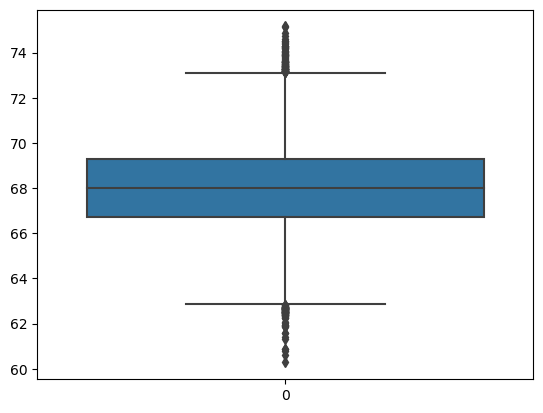

In [6]:
sns.boxplot(df['Height(Inches)'])

In [8]:
df["Height(Inches)"].describe()

count    25000.000000
mean        67.993114
std          1.901679
min         60.278360
25%         66.704397
50%         67.995700
75%         69.272958
max         75.152800
Name: Height(Inches), dtype: float64

In [9]:
df["Height(Inches)"].skew()

-0.00565797936693913

/tmp/ipykernel_300/2122790197.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Height(Inches)'])


<AxesSubplot: xlabel='Height(Inches)', ylabel='Density'>

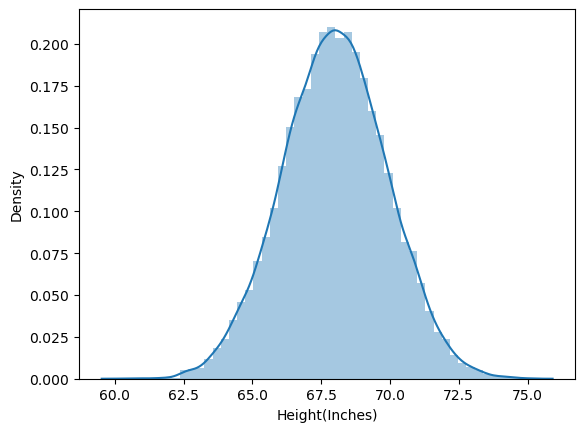

In [11]:
sns.distplot(df['Height(Inches)'])

/tmp/ipykernel_300/3598723887.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight(Pounds)'])


<AxesSubplot: xlabel='Weight(Pounds)', ylabel='Density'>

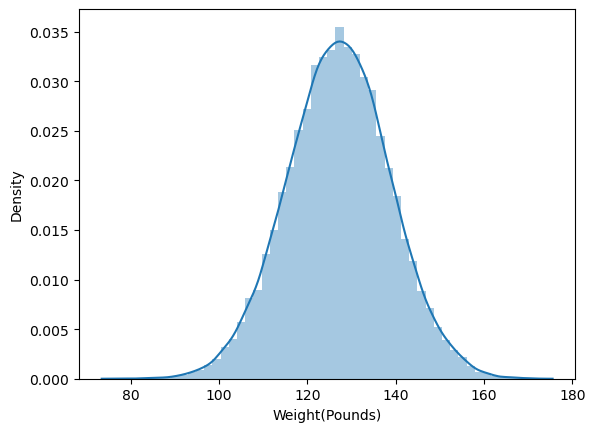

In [12]:
sns.distplot(df['Weight(Pounds)'])

In [22]:
df["Height(Inches)"].min()

60.27836

In [29]:
p1=df["Height(Inches)"].quantile(0.01)
p99=df["Height(Inches)"].quantile(0.99)

In [34]:
p1

63.5986493

In [46]:
#TRIMMING
new_df=df[ (df["Height(Inches)"] >= p1) & (df["Height(Inches)"] <= p99) ]

In [44]:
new_df["Height(Inches)"].shape

(24500,)

<AxesSubplot: >

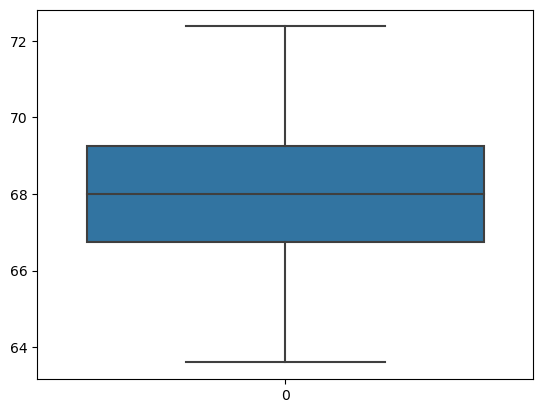

In [45]:
sns.boxplot(new_df["Height(Inches)"])

capping aka winsorisation.
replacing outlier data points with threshold limits

In [60]:
new_df2= np.where(df["Height(Inches)"] < p1,p1,
         (np.where(df["Height(Inches)"] > p99,p99,df["Height(Inches)"])))

In [62]:
print(type(new_df2))

<class 'numpy.ndarray'>


In [65]:
new_df2=pd.DataFrame(new_df2,columns=["Height(Inches)"])

In [69]:
new_df2.describe()

,Height(Inches)
count,25000.000000
mean,67.992508
std,1.868011
min,63.598649
25%,66.704397
50%,67.995700
75%,69.272958
max,72.372215


In [75]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


<AxesSubplot: >

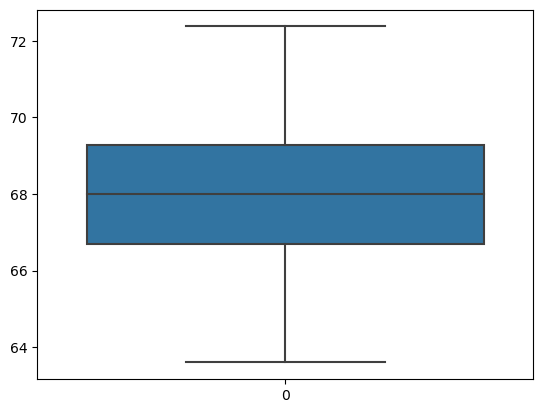

In [76]:
sns.boxplot(new_df2["Height(Inches)"])